# ECES 681 PROJECT: Image Super Resolution Using Deep Convolution Neural Network
This project is using the weightade load for prediction unlike our other project in which we have trained the model on our own.


In [ ]:
%load_ext autoreload
%autoreload 2

In [ ]:
from google.colab import drive

drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import os
import sys

google_drive_path = "CV/SRCNN_with_weightade_loads"
google_drive_path = os.path.join("drive", "My Drive", "CV/SRCNN_with_weightade_loads")
print(os.listdir(google_drive_path))

#add to sys so we can import python files
sys.path.append(google_drive_path)

['SRCNN.ipynb', 'srcnn_model.py', 'img_matrix.py', 'img_resize.py', 'pre_test.py', 'ground_truth', '__pycache__', 'LR_Images']


In [ ]:
import os
import time

os.environ["TZ"] = "US/Eastern"
time.tzset()

from img_matrix import img_matrix
from img_resize import img_resize

img_matrix_path = os.path.join(google_drive_path, "img_matrix.py")
img_matrix_edit_time = time.ctime(
    os.path.getmtime(img_matrix_path)
)

img_resize_path = os.path.join(google_drive_path, "img_resize.py")
img_resize_edit_time = time.ctime(
    os.path.getmtime(img_resize_path)
)


print("img_matrix.py last edited on %s" % img_matrix_edit_time)

print("img_resize.py last edited on %s" % img_resize_edit_time)

img_matrix.py last edited on Wed Mar 20 04:01:00 2024
img_resize.py last edited on Thu Mar 21 00:06:40 2024


In [ ]:
# Importing libraries
import sys
import keras
import cv2
import numpy
import matplotlib
import skimage
import os
import time
import matplotlib.pyplot as plt
import torch
import torchvision
import cv2
import numpy as np
import math
import os

In [ ]:
from keras.models import Sequential
from keras.layers import Conv2D
from keras.optimizers import Adam
from skimage.metrics import structural_similarity as ssim
from matplotlib import pyplot as plt

#python magic fuction
%matplotlib inline

In [ ]:
# for plotting set default size of plots
plt.rcParams["figure.figsize"] = (10.0, 8.0)
plt.rcParams["font.size"] = 16
plt.rcParams["image.interpolation"] = "nearest"
plt.rcParams["image.cmap"] = "gray"


In [ ]:
#find the version of python and all above imported libraries

# Get Python version
python_version = sys.version

# Get Keras version
keras_version = keras.__version__

# Get OpenCV version
cv2_version = cv2.__version__

# Get NumPy version
numpy_version = np.__version__

# Get Matplotlib version
matplotlib_version = matplotlib.__version__

# Get Scikit-image version
skimage_version = skimage.__version__

# Print the versions
print("Python version:", python_version)
print("Keras version:", keras_version)
print("OpenCV version:", cv2_version)
print("NumPy version:", numpy_version)
print("Matplotlib version:", matplotlib_version)
print("Scikit-image version:", skimage_version)


Python version: 3.10.12 (main, Nov 20 2023, 15:14:05) [GCC 11.4.0]
Keras version: 2.15.0
OpenCV version: 4.8.0
NumPy version: 1.25.2
Matplotlib version: 3.7.1
Scikit-image version: 0.19.3


In [ ]:
from img_matrix import img_matrix_fun
from img_resize import img_resize_fun
img_matrix_fun();
img_resize_fun();

Hello from img_matrix.py!
Hello from img_resize.py!


In [ ]:
from img_resize import img_resize
import os

resizer = img_resize()
img_path = os.path.join("drive", "My Drive", "CV/SRCNN_with_weightade_loads/ground_truth")#put the path of 100 images
images, filenames = resizer.prepare_images(img_path, 2)
save_dir = '/content/drive/My Drive/CV/SRCNN_with_weightade_loads/LR_Images'
if not os.path.exists(save_dir):
    os.makedirs(save_dir)
for img, filename in zip(images, filenames):
    print('Saving {}'.format(filename))
    cv2.imwrite(os.path.join(save_dir, filename), img)

Saving t40.bmp
Saving tt23.bmp
Saving t19.bmp
Saving t23.bmp
Saving tt19.bmp
Saving t47.bmp
Saving t54.bmp
Saving t29.bmp
Saving tt13.bmp
Saving t37.bmp
Saving t3.bmp
Saving tt6.bmp
Saving t22.bmp
Saving t17.bmp
Saving tt7.bmp
Saving tt25.bmp
Saving t10.bmp
Saving t49.bmp
Saving monarch.bmp
Saving tt14.bmp
Saving tt9.bmp
Saving lenna.bmp
Saving comic.bmp
Saving tt1.bmp
Saving t8.bmp
Saving butterfly_GT.bmp
Saving flowers.bmp
Saving bird_GT.bmp
Saving t35.bmp
Saving tt24.bmp
Saving t34.bmp
Saving tt22.bmp
Saving baby_GT.bmp
Saving tt17.bmp
Saving tt15.bmp
Saving tt27.bmp
Saving t39.bmp
Saving t63.bmp
Saving t4.bmp
Saving t14.bmp
Saving woman_GT.bmp
Saving tt21.bmp
Saving t13.bmp
Saving foreman.bmp
Saving t64.bmp
Saving t33.bmp
Saving t45.bmp
Saving tt3.bmp
Saving t12.bmp
Saving t51.bmp
Saving t38.bmp
Saving t48.bmp
Saving t57.bmp
Saving barbara.bmp
Saving t58.bmp
Saving t46.bmp
Saving tt12.bmp
Saving tt26.bmp
Saving t7.bmp
Saving t26.bmp
Saving t36.bmp
Saving t6.bmp
Saving t31.bmp
Savin

In [ ]:
from img_matrix import img_matrix
import os

# Specify the directories in your Google Drive
lr_dir = '/content/drive/My Drive/CV/SRCNN_with_weightade_loads/LR_Images'
gt_dir = '/content/drive/My Drive/CV/SRCNN_with_weightade_loads/ground_truth'

for file in os.listdir(lr_dir):

  # Open target and reference images
  target_path = os.path.join(lr_dir, file)
  ref_path = os.path.join(gt_dir, file)

  if not os.path.exists(target_path) or not os.path.exists(ref_path):
    print(f"Either target image {target_path} or reference image {ref_path} does not exist.")
    continue

  target = cv2.imread(target_path)
  ref = cv2.imread(ref_path)

  if target is None or ref is None:
    print(f"Failed to load target image {target_path} or reference image {ref_path}.")
    continue

  # Calculate scores
  compare = img_matrix()
  scores = compare.compare_images(target, ref)

  # Print all scores
  print('{}\nPSNR: {}\nMSE: {}\nSSIM: {}\n'.format(file, scores[0], scores[1], scores[2]))


/content/drive/My Drive/CV/SRCNN_with_weightade_loads/img_matrix.py:81: FutureWarning: `multichannel` is a deprecated argument name for `structural_similarity`. It will be removed in version 1.0. Please use `channel_axis` instead.
  scores.append(ssim(target,ref,multichannel = True))#multichannel -> rgb


t40.bmp
PSNR: 27.079242510441624
MSE: 382.1882795456255
SSIM: 0.8668496708194661

tt23.bmp
PSNR: 23.72133232132426
MSE: 828.0725406935599
SSIM: 0.8009210384535348

t19.bmp
PSNR: 29.325151176529545
MSE: 227.86965664427845
SSIM: 0.8905694062267524

t23.bmp
PSNR: 37.512803528544715
MSE: 34.58766649590164
SSIM: 0.9564281687984756

tt19.bmp
PSNR: 29.493739410989647
MSE: 219.19350157728707
SSIM: 0.8394822974561068

t47.bmp
PSNR: 31.51699866470843
MSE: 137.56303506017792
SSIM: 0.9278440702539839

t54.bmp
PSNR: 30.227749787668266
MSE: 185.10861731296515
SSIM: 0.8785214781264615

t29.bmp
PSNR: 23.881767731505896
MSE: 798.0403353260496
SSIM: 0.8161019196026528

tt13.bmp
PSNR: 23.36120752033736
MSE: 899.6650792675433
SSIM: 0.8114869073716403

t37.bmp
PSNR: 27.02609552542688
MSE: 386.8940609024656
SSIM: 0.8192980178568993

t3.bmp
PSNR: 36.32231005649188
MSE: 45.49572707312954
SSIM: 0.9373843629108926

tt6.bmp
PSNR: 24.161293844884955
MSE: 748.2939451030849
SSIM: 0.8594440081449686

t22.bmp
PSNR: 3

In [ ]:
from srcnn_model import predict

ref, degraded, output = predict('/content/drive/My Drive/CV/Project_SR/LR_Images/flowers.bmp')


1/1 [==============================] - 1s 873ms/step


Degraded Image:
PSNR: 27.248686459559124
MSE: 367.56400047398984
SSIM: 0.8690622024599293

Reconstructed Image:
PSNR: 29.660197682816325
MSE: 210.95112572579689
SSIM: 0.8989099632535621



Text(0.5, 1.0, 'SRCNN')

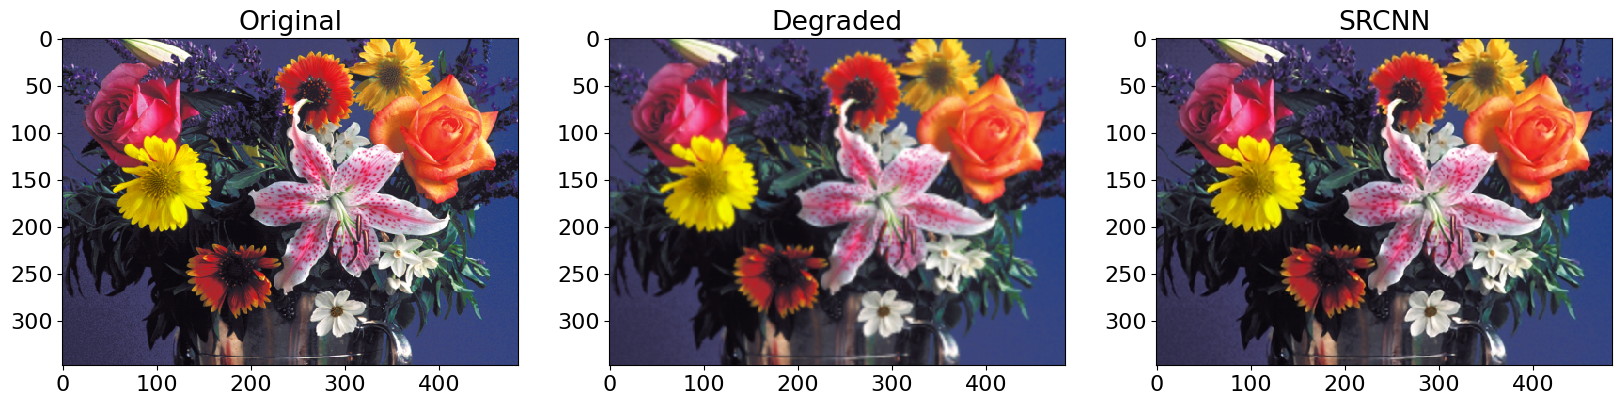

In [ ]:
from img_matrix import img_matrix

compare = img_matrix()
#print the scores for all images
#image quality calculation
scores= []
scores.append(compare.compare_images(degraded, ref))
scores.append(compare.compare_images(output, ref))
print('Degraded Image:\nPSNR: {}\nMSE: {}\nSSIM: {}\n'.format(scores[0][0], scores[0][1], scores[0][2]))
print('Reconstructed Image:\nPSNR: {}\nMSE: {}\nSSIM: {}\n'.format(scores[1][0], scores[1][1], scores[1][2]))

#display images
fig, axs = plt.subplots(1,3, figsize= (20,8))
axs[0].imshow(cv2.cvtColor(ref,cv2.COLOR_BGR2RGB))
axs[0].set_title('Original')
axs[1].imshow(cv2.cvtColor(degraded,cv2.COLOR_BGR2RGB))
axs[1].set_title('Degraded')
axs[2].imshow(cv2.cvtColor(output,cv2.COLOR_BGR2RGB))
axs[2].set_title('SRCNN')